Импортируем нужные библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [4]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [6]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({6: 21, 4: 19, 2: 19, 5: 15, 1: 14, 3: 12})
Вероятности выпадений каждой из сторон:
{3: 0.12, 1: 0.14, 6: 0.21, 4: 0.19, 5: 0.15, 2: 0.19}


Это и есть оценка функции вероятности дискретного распределения.(это все так интересно выглядит)

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [7]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

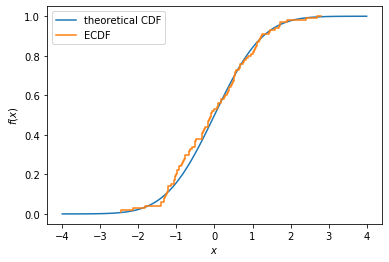

In [25]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF(эмперическая) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label = 'ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

В 2.1 использовался параметр normed, сейчас используется density

DENSITY : Если True, то первым элементом возвращаемого кортежа будет число, нормализованное для формирования плотности вероятности, т. Е. Площадь (или интеграл) под гистограммой будет равна 1. Это достигается путем деления счетчика на количество наблюдений ширина bin и не делится на общее количество наблюдений. Если для суммирования также задано значение True, сумма гистограмм нормализуется до 1.

По умолчанию None для нормированных и плотности. Если любой из них установлен, то это значение будет использоваться. Если ни один из них не установлен, то аргументы будут считаться ложными.

Text(0.5, 0, '$x$')

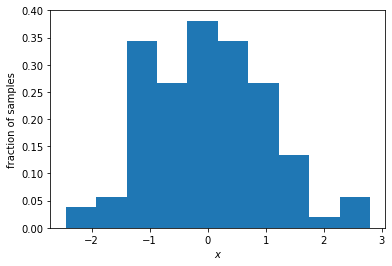

In [20]:
plt.hist(sample, density = True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

sample - сама выборка, bins - колличество ребер на гистограмме

Text(0.5, 0, '$x$')

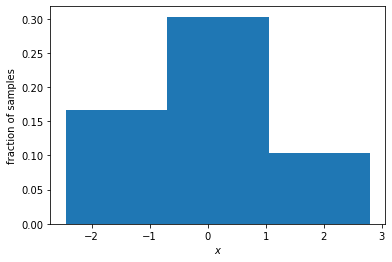

In [24]:
plt.hist(sample, bins = 3, density = True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

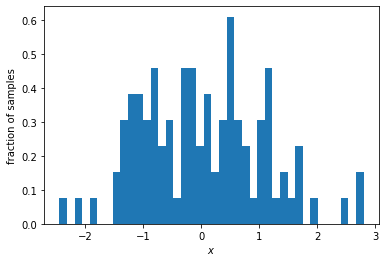

In [29]:
plt.hist(sample, bins = 40, density = True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

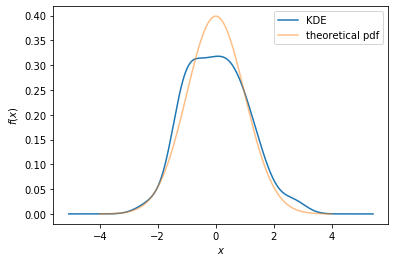

In [30]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')